In [1]:
from greem.utility.monitoring import BaseMonitoring, RegularMonitoring, PeriodicMonitoring
from codecarbon import EmissionsTracker
import os
import pandas as pd
from time import sleep
from codecarbon.output import EmissionsData
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
host_name: str = os.uname()[1]
host_name

'Christians-MacBook-Pro.local'

In [3]:
# rm = RegularMonitoring(measure_power_secs=10)

# pm = PeriodicMonitoring(measure_power_secs=0.5)

```bash
for run in {1..5}; do
  ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4
done
```

In [4]:
def start_measuring(measurement_interval: float, repetitions: int = 10, sleep_time: float = 0) -> list[EmissionsData]:
    tracker = EmissionsTracker(
        measure_power_secs=measurement_interval, 
        project_name='test test', 
        log_level='error',
        output_file=f'periodic_emissions_{host_name}.csv')
    pm = PeriodicMonitoring(tracker=tracker)

    if sleep_time == 0:

        presets = ['medium', 'fast', 'slow']
    
        for i in range(repetitions):
            print(len(pm.collected_data))
            pm.tracker._project_name = f'Beauty_s000_{measurement_interval}s_{(i + 1)}_{host_name}'
            
            # os.system('ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4')
            pm.scheduler.start()
            pm.start_monitoring(f'ffmpeg -hide_banner -loglevel error -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset {presets[i]} -keyint_min 10 -g 10 test.mp4')
            pm.scheduler.stop()


            # sleep(0.2)
    
    else:
        for i in range(repetitions):
            tracker._project_name = f'sleep_{measurement_interval}s_{(i + 1)}_{host_name}'
            # tracker.start()
            os.system(f'sleep {sleep_time}')
            # tracker.stop()
            # sleep(0.2)

    pm.tracker.stop()
    pm.scheduler.stop()
    return pm.collected_data


In [5]:
step: float = 0.25

intervals: list[float] = [0.125] + [step * x for x in range(1, 13)]
last_val = intervals[-1]
# intervals.extend([1 * x + last_val for x in range(1, 18)])
intervals

[0.125, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]

In [6]:
collected_measurements: list[EmissionsData] = []

# for i in intervals[:2]:
#     collected_measurements.extend(start_measuring(i, 2))
collected_measurements.extend(start_measuring(0.25, 3))

0
11
20


In [7]:
collected_measurements

[MonitoringData(timestamp='2024-03-19T09:44:01', project_name='Beauty_s000_0.25s_1_Christians-MacBook-Pro.local', run_id='7020e16b-3f1c-4d3d-aae9-bf08f51a580c', duration=1.0056610107421875, emissions=3.281977605587906e-07, emissions_rate=3.263502880722974e-07, cpu_power=5.0, gpu_power=0.0, ram_power=12.0, cpu_energy=1.0612484481599597e-06, gpu_energy=0, ram_energy=2.5450825691223143e-06, energy_consumed=3.606331017282274e-06, country_name='Austria', country_iso_code='AUT', region='carinthia', cloud_provider='', cloud_region='', os='macOS-14.4-arm64-arm-64bit', python_version='3.10.13', codecarbon_version='2.2.2', cpu_count=10, cpu_model='Apple M1 Max', gpu_count=None, gpu_model=None, longitude=14.1513, latitude=46.5637, ram_total_size=32.0, tracking_mode='machine', on_cloud='N'),
 MonitoringData(timestamp='2024-03-19T09:44:02', project_name='Beauty_s000_0.25s_1_Christians-MacBook-Pro.local', run_id='7020e16b-3f1c-4d3d-aae9-bf08f51a580c', duration=1.0051298141479492, emissions=4.3565786

In [8]:
len(collected_measurements)

29

In [9]:
df = pd.DataFrame(collected_measurements)
df['video_index'] = df['project_name'].apply(lambda x: x.split('_')[3])
df.head(2)

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,video_index
0,2024-03-19T09:44:01,Beauty_s000_0.25s_1_Christians-MacBook-Pro.local,7020e16b-3f1c-4d3d-aae9-bf08f51a580c,1.005661,3.281978e-07,3.263503e-07,5.0,0.0,12.0,0.000001,...,10,Apple M1 Max,None,None,14.1513,46.5637,32.0,machine,N,1
1,2024-03-19T09:44:02,Beauty_s000_0.25s_1_Christians-MacBook-Pro.local,7020e16b-3f1c-4d3d-aae9-bf08f51a580c,1.005130,4.356579e-07,4.334344e-07,5.0,0.0,12.0,0.000001,...,10,Apple M1 Max,None,None,14.1513,46.5637,32.0,machine,N,1


In [10]:
df['emissions_rate_norm'] = df['emissions_rate'] / df['emissions_rate'].max()

Text(0.5, 0, 'Periodic Measurement Interval [s]')

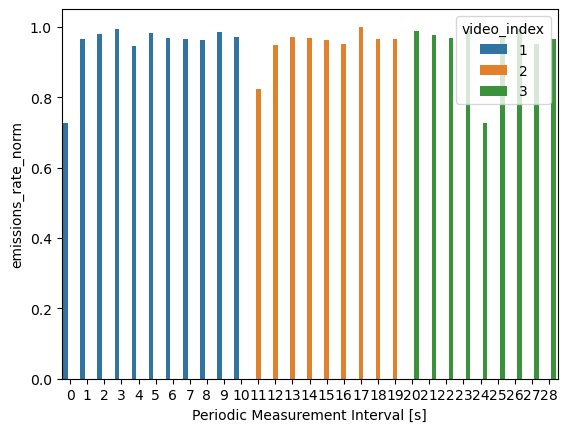

In [11]:
# df['emissions_rate_norm'].plot.bar()
sns.barplot(data=df, x=df.index, y='emissions_rate_norm', hue='video_index')

plt.xlabel('Periodic Measurement Interval [s]')

/var/folders/k8/rwvwc5ns3d16t55m5svq75wh0000gn/T/ipykernel_26242/2398987304.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_df.agg('sum')


,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,longitude,latitude,ram_total_size,emissions_rate_norm
video_index,,,,,,,,,,,,,,,
1,11.054009,0.000005,0.000005,55.0,0.0,132.0,0.000015,0,0.000037,0.000052,110,155.6643,512.2007,352.0,10.442969
2,9.251200,0.000004,0.000004,45.0,0.0,108.0,0.000013,0,0.000031,0.000043,90,127.3617,419.0733,288.0,8.552956
3,9.748887,0.000004,0.000004,45.0,0.0,108.0,0.000013,0,0.000032,0.000046,90,127.3617,419.0733,288.0,8.527291


/var/folders/k8/rwvwc5ns3d16t55m5svq75wh0000gn/T/ipykernel_26242/2156438786.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = combined_df.agg('sum')


<Axes: xlabel='video_index', ylabel='emissions_rate_norm'>

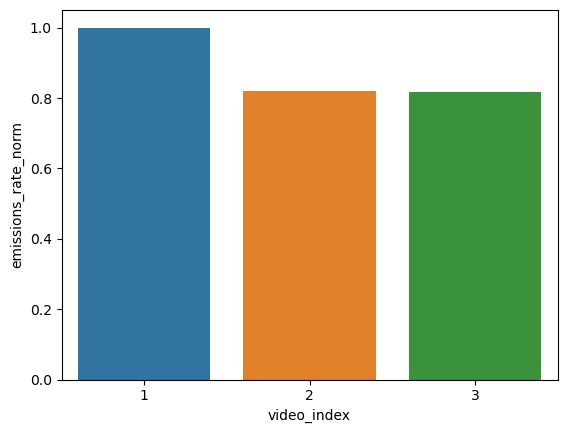

In [18]:
combined_df = df.groupby('video_index')
agg = combined_df.agg('sum')
agg['emissions_rate_norm'] = agg['emissions_rate'] / agg['emissions_rate'].max()
sns.barplot(data=agg, x=agg.index, y='emissions_rate_norm')

In [26]:
# for i in range(10):
#     tracker._project_name = f'Beauty_s000_{measurement_interval}s_{i}'
#     tracker.start()
#     os.system('ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4')
#     tracker.stop()
#     sleep(0.2)
    

# for i in range(10):
#     tracker._project_name = f'sleep_{measurement_interval}s_{i}'
#     tracker.start()
#     os.system('sleep 3')
#     tracker.stop()
#     sleep(0.2)

In [27]:
# for i in range(12):
#     rm.start_monitoring('sleep 2')

# # rm.tracker.stop()
# rm.tracker.stop()

# rm.collected_data

In [28]:
# for i in rm.collected_data:
#     print(type(i))